In [1]:
#NYC stop and frisk mapped 

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import geopandas as geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely.geometry import box
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import adjustText as aT
import missingno as msn #helps with missing data in geo data sets 
import seaborn as sns
import json 

In [6]:
StopAndFriskdf = pd.read_csv("/Users/jordan/Documents/GitHub/2018NycStopAndFrisk/2018_sqf_database.csv")

#A snapshot of the data.
StopAndFriskdf.head(3)

,STOP_FRISK_ID,STOP_FRISK_DATE,Stop Frisk Time,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/1/18,19:04:00,2018,January,Monday,Based on C/W on Scene,APP,POM,1,...,G,(null),VARICK STREET && FRANKLIN STREET,(null),VARICK STREET,982327,201274,(null),PBMS,MANHATTAN
1,2,1/1/18,23:00:00,2018,January,Monday,Based on Radio Run,APP,POM,34,...,C,(null),DYCKMAN STREET && POST AVENUE,(null),DYCKMAN STREET,1004892,253548,(null),PBMN,MANHATTAN
2,3,1/1/18,23:55:00,2018,January,Monday,Based on Radio Run,APP,POM,808,...,B,4M,2245 RANDALL AVENUE,(null),RANDALL AVENUE,1026706,237776,(null),PBBX,BRONX


In [32]:
country = geopandas.read_file("/Users/jordan/Documents/GitHub/geospatial_learning/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [12]:
#Check the type of data that is contained in this dataframe
type(country)

geopandas.geodataframe.GeoDataFrame

In [13]:
#Check the data type of 
type(country.geometry)

geopandas.geoseries.GeoSeries

In [14]:
type(country.geometry[0])


shapely.geometry.multipolygon.MultiPolygon

<IPython.core.display.Javascript object>


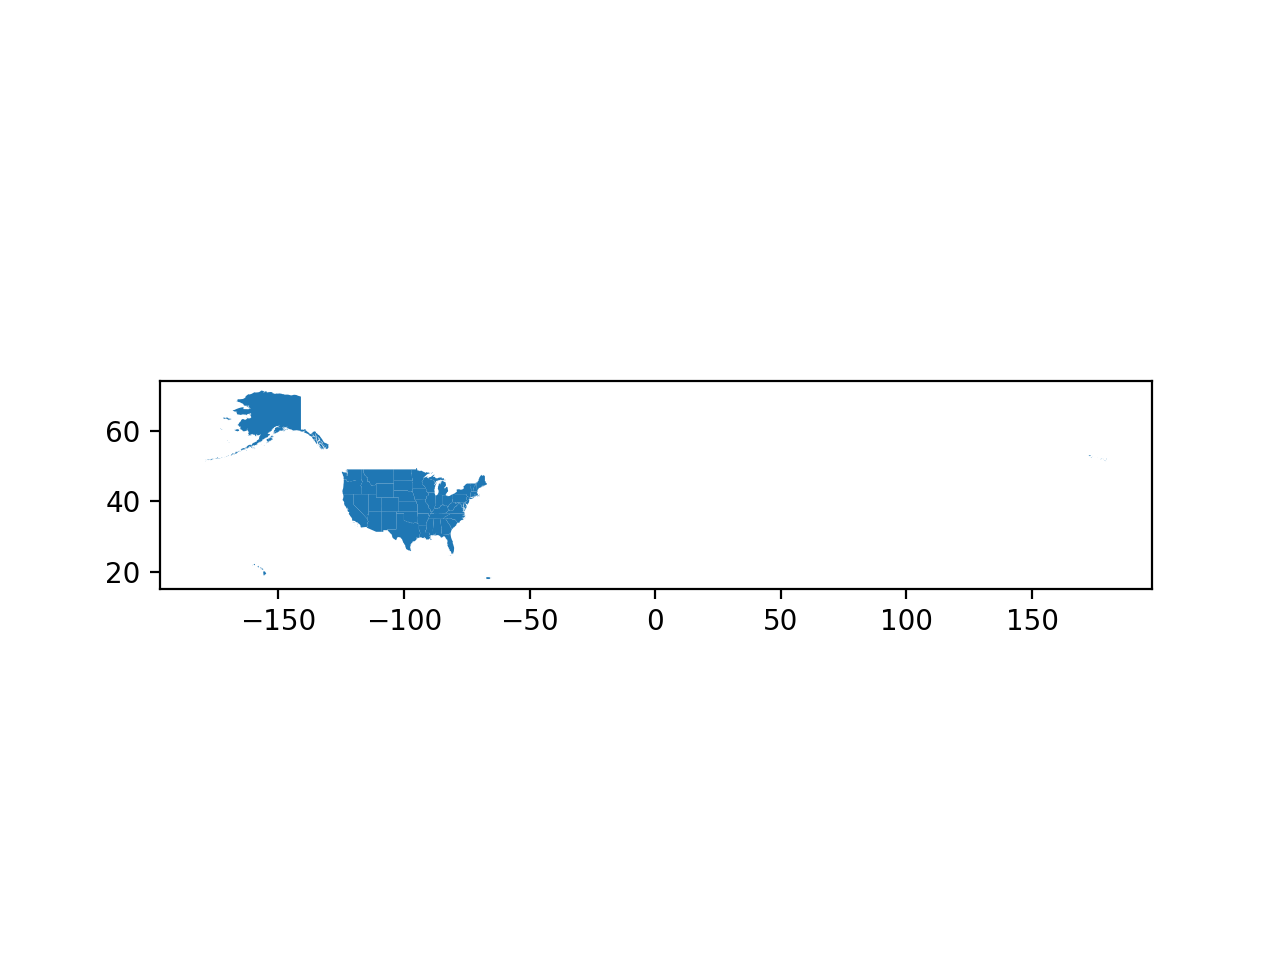

<AxesSubplot:>

In [15]:
country.plot()


<IPython.core.display.Javascript object>


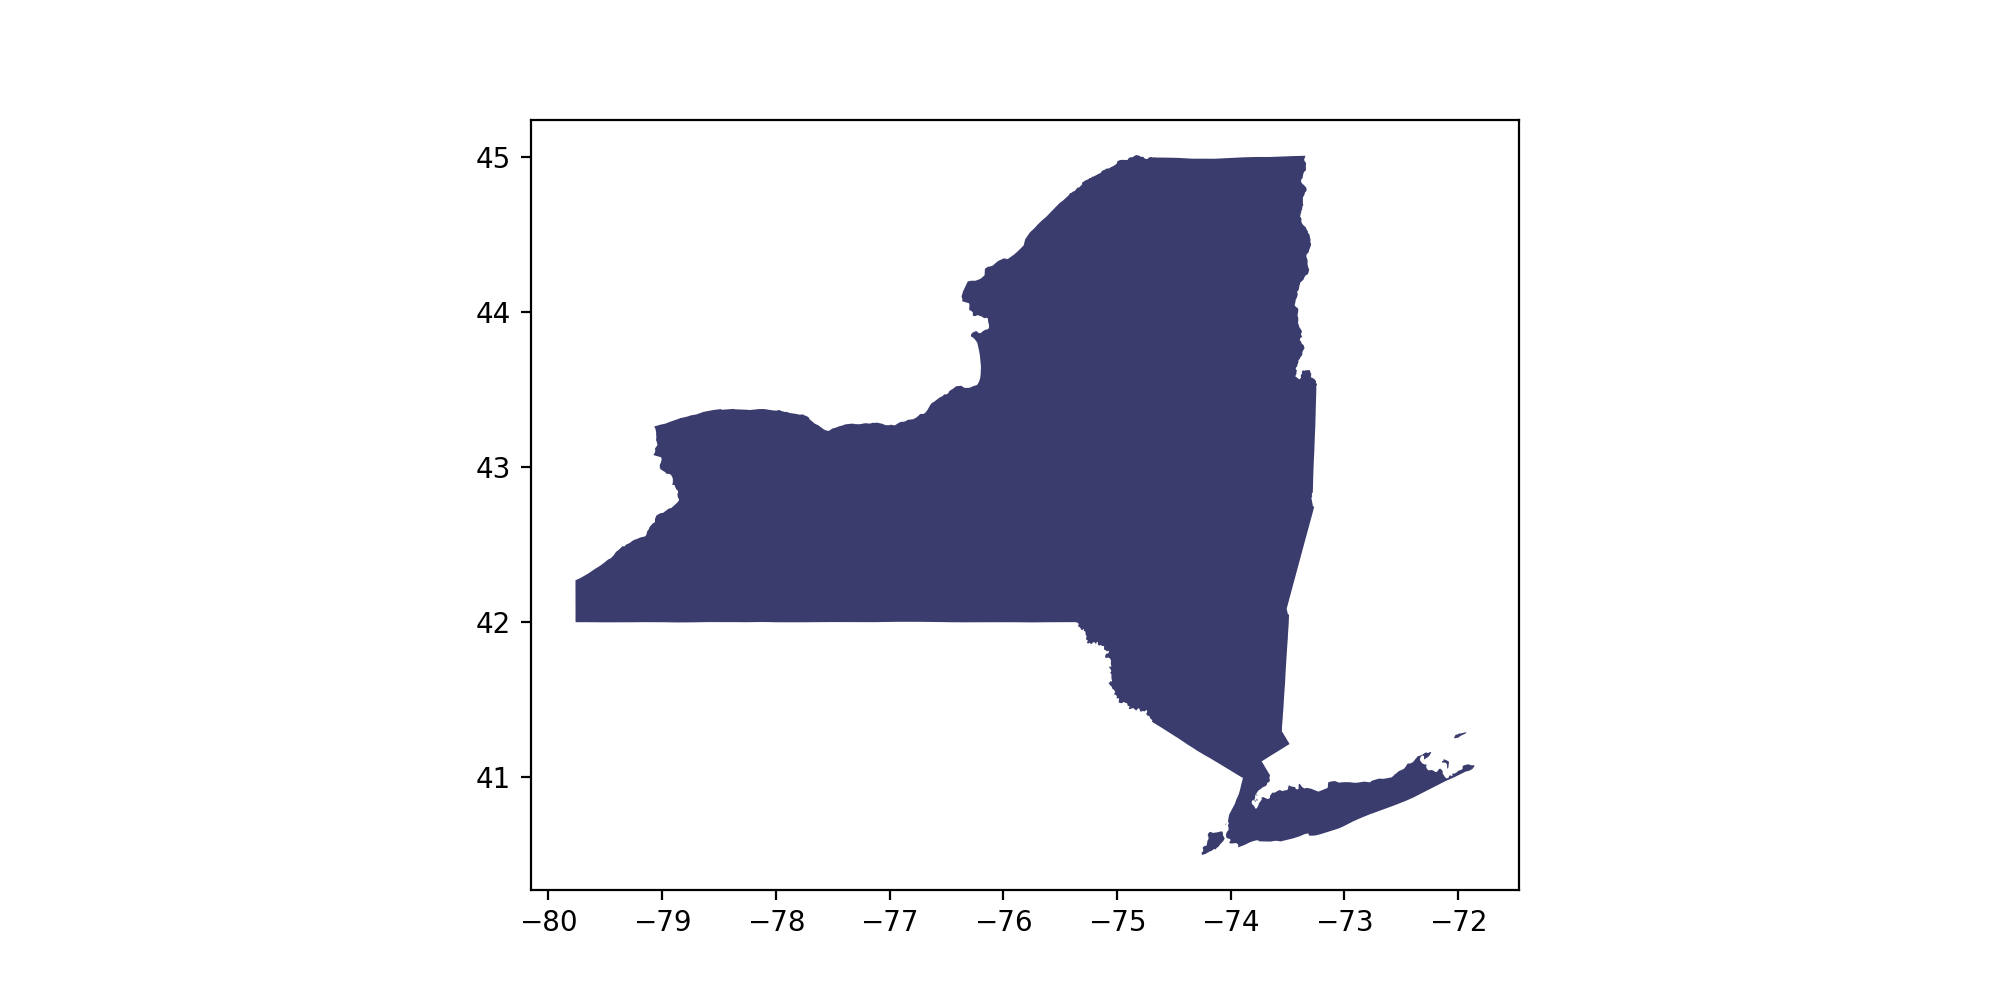

In [28]:
country[country['NAME'].isin(['New York'])].plot(figsize=(10,5), color='#3B3C6E');

In [38]:
counties = geopandas.read_file("/Users/jordan/Documents/GitHub/geospatial_learning/gz_2010_us_050_00_500k.json")


TypeError: startswith first arg must be bytes or a tuple of bytes, not str